The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



First let's load the dataset

In [1]:
import pandas as pd
dataset=pd.read_csv("T:/sem2/DMML_DS/assignment/bank-data/bank-additional-full.csv",sep=";")

Let's take look at first 5 instance of data

In [2]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

So the good thing is we don't have any missing data, as we have 41188 entries and for each attribute we have 41188 non null values

For now we are considering unknown as class label, we will see it what do with it later

The Attribute Information tells us to not include duration attribute as this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

We are removing it for now

In [4]:
dataset=dataset.drop(["duration"],axis=1)

Let's do some EDA

In [5]:
dataset.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Bank targeted population is slightly old people

As 999pdays means the person was never contacted before, most of the persons are being contacted for first time


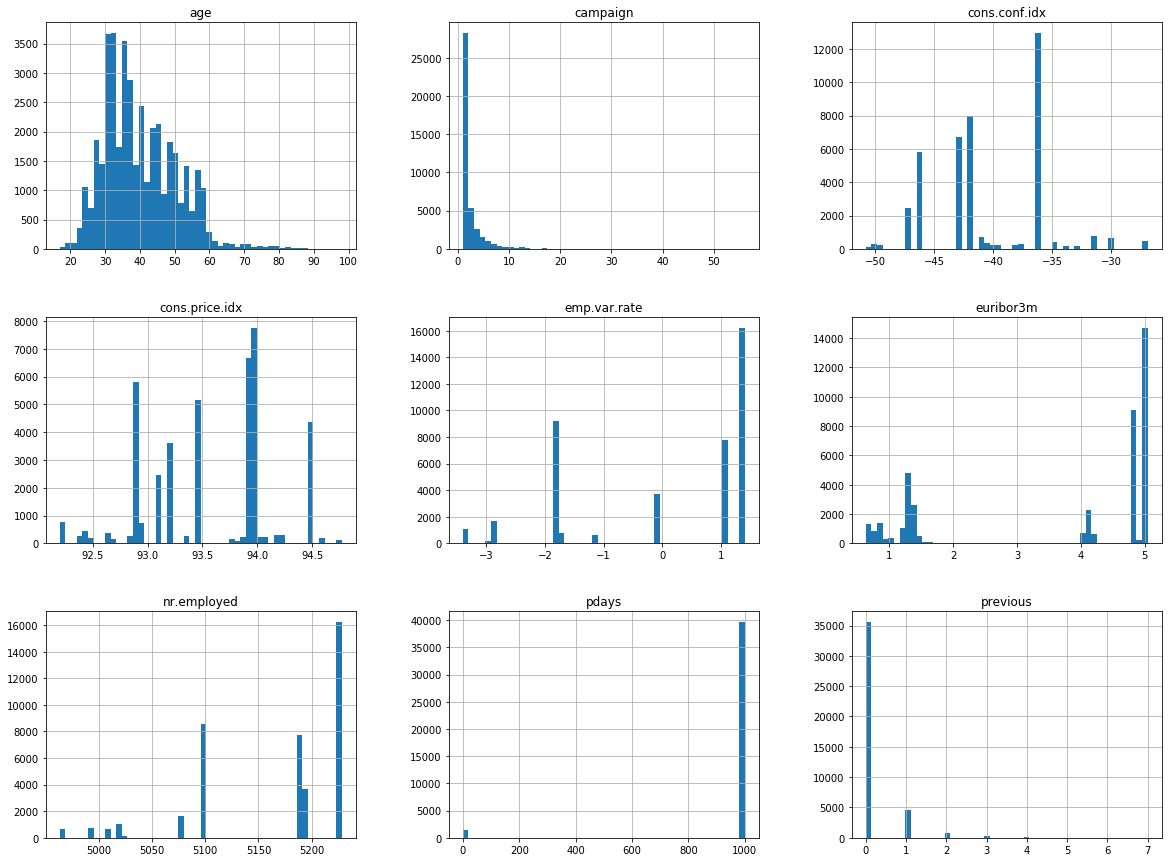

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
dataset["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

admin and blue collar are bank's main target customer

In [8]:
dataset["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Married are bank's main target customer



In [9]:
dataset["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

People with university degree are high school are bank's main target customer

In [10]:
dataset["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

There is almost equal spread between people having housing loan or not

In [11]:
dataset["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

People with personal loan seems to be bank's main target customer

In [12]:
dataset["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [13]:
dataset["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [14]:
dataset["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [15]:
dataset["poutcome"].value_counts() 

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

### Creation of test Data set

Let's create test set and keep it aside for testing purpose

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(dataset,test_size=0.2,random_state=2)

In [17]:
len(X_train),len(X_test)

(32950, 8238)

Separation of target values

In [18]:
y_train=X_train["y"].copy()

In [19]:
X_train=X_train.drop("y",axis=1)

In [20]:
y_test=X_test["y"].copy()

In [21]:
X_test=X_test.drop("y",axis=1)

Converting yes/no label to numerical labels(0,1)

In [22]:
type(y_train)

pandas.core.series.Series

In [23]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train_binary=lb.fit_transform(y_train)
y_train_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
y_train_binary.shape

(32950, 1)

In [25]:
lb.classes_

array(['no', 'yes'], dtype='<U3')

0 is dummy variable for no and 1 is dummy variable for yes

In [26]:
y_test_binary=lb.transform(y_test)

In [27]:
num_attributes=["age","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]

In [28]:
cat_attributes=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])

In [30]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline=Pipeline([("one_hot_enc",OneHotEncoder()),])

In [31]:
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",cat_pipeline,cat_attributes)
])

In [32]:
X_transformed=full_pipeline.fit_transform(X_train)

## SVM

In [33]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_transformed, y_train_binary.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X_transformed, y_train_binary.ravel(), cv=10, scoring="accuracy")

array([0.89742033, 0.89650986, 0.9016692 , 0.89711684, 0.89924127,
       0.9047041 , 0.9016692 , 0.89802731, 0.89468892, 0.89893778])

Now Predicting values using our SVM model

In [35]:
X_test_transformed=full_pipeline.transform(X_test)

In [36]:
y_pred_svm=svm_clf.predict(X_test_transformed)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_binary.ravel(),y_pred_svm)

array([[7262,   56],
       [ 754,  166]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_binary,y_pred_svm)

0.9016751638747269

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit( X_transformed, y_train_binary.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
cross_val_score(tree_clf, X_transformed, y_train_binary.ravel(), cv=10, scoring="accuracy")

array([0.82883156, 0.84279211, 0.84491654, 0.83550835, 0.83823976,
       0.83945372, 0.8461305 , 0.84066768, 0.84461305, 0.84673748])

In [41]:
y_pred_tree=tree_clf.predict(X_test_transformed)

In [42]:
confusion_matrix(y_test_binary.ravel(),y_pred_tree)

array([[6625,  693],
       [ 611,  309]], dtype=int64)

In [43]:
accuracy_score(y_test_binary.ravel(),y_pred_tree)

0.8417091527069677

## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_transformed, y_train_binary.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
cross_val_score(nb_clf, X_transformed, y_train_binary.ravel(), cv=10, scoring="accuracy")

array([0.7908953 , 0.80364188, 0.80394537, 0.79969651, 0.79544765,
       0.80060698, 0.81335357, 0.79878604, 0.80121396, 0.8091047 ])

In [46]:
y_pred_nb=nb_clf.predict(X_test_transformed)

In [47]:
confusion_matrix(y_test_binary.ravel(),y_pred_nb)

array([[6068, 1250],
       [ 352,  568]], dtype=int64)

In [48]:
accuracy_score(y_test_binary.ravel(),y_pred_nb)

0.8055353241077932